In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import cv2
import zipfile
import shutil
import os
import glob

#matplot 한글폰트 설정
import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:\Windows\Fonts\GULIM.TTC").get_name()
plt.rc("font", family = font_name)

import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"]= False

In [38]:
df1 = pd.read_csv("C:/seokwonna/pythonwork/AI/FinalProject/csv_file/csv_file/6번농장_concat.csv", index_col= 0)
df1

,채널1 구역,날짜,시간,설정량1,설정량2,설정량3,설정량4,설정량5,설정량6,설정량7,...,G2,G3,J/30min,J/Day,경보내용,경보데이터,동작구역회수,전구역관수횟수,유량센서카운트,유량(L)
0,0,2021-10-1,0:0:48,100,100,,,,,,...,0,0,0,1453,경보없음,0:0:0:0:0:0:0:0:0:0:,0,0:0:0:0:0:0:0:0:0:0:0:0:,0,0
1,0,2021-10-1,0:1:46,100,100,,,,,,...,0,0,0,1453,경보없음,0:0:0:0:0:0:0:0:0:0:,0,0:0:0:0:0:0:0:0:0:0:0:0:,0,0
2,0,2021-10-1,0:2:48,100,100,,,,,,...,0,0,0,1453,경보없음,0:0:0:0:0:0:0:0:0:0:,0,0:0:0:0:0:0:0:0:0:0:0:0:,0,0
3,0,2021-10-1,0:3:46,100,100,,,,,,...,0,0,0,1453,경보없음,0:0:0:0:0:0:0:0:0:0:,0,0:0:0:0:0:0:0:0:0:0:0:0:,0,0
4,0,2021-10-1,0:4:49,100,100,,,,,,...,0,0,0,1453,경보없음,0:0:0:0:0:0:0:0:0:0:,0,0:0:0:0:0:0:0:0:0:0:0:0:,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152993,0,2022-1-26,10:12:45,220,220,,,,,,...,0,0,0,0,경보없음,0:0:0:0:0:0:0:0:0:0:,0,1:1:0:0:0:0:0:0:0:0:0:0:,330,3300
152994,0,2022-1-26,10:13:47,220,220,,,,,,...,0,0,0,0,경보없음,0:0:0:0:0:0:0:0:0:0:,0,1:1:0:0:0:0:0:0:0:0:0:0:,330,3300
152995,0,2022-1-26,10:14:48,220,220,,,,,,...,0,0,0,0,경보없음,0:0:0:0:0:0:0:0:0:0:,0,1:1:0:0:0:0:0:0:0:0:0:0:,330,3300
152996,0,2022-1-26,10:15:45,220,220,,,,,,...,0,0,0,0,경보없음,0:0:0:0:0:0:0:0:0:0:,0,1:1:0:0:0:0:0:0:0:0:0:0:,330,3300


In [107]:
df2 = pd.read_csv("C:/seokwonna/pythonwork/AI/FinalProject/csv_file/csv_file/6번농장_df4.csv", index_col= 0)
df2

,time,EC급액,EC배액,pH급액,pH배액,저울급액,저울배액,온도토양,온도급액,온도배액,내부이산화탄소,내부광량,내부PT100온도센서1번건구,내부PT100온도센서2번습구,내부PT100온도센서3번,내부PT100센서를이용한계산습도
0,2021-10-25 11:17:56,2.74636,3.66298,6.999,6.999,15.92036,11.631090,-1000.0000,-1000.000,-1000.0000,361,283.7639,26.54632,23.43446,25.49748,83.06425
1,2021-10-25 11:19:32,2.75214,3.67861,5.951,6.768,15.90217,5.444240,21.0625,25.250,23.2500,345,302.7681,26.68179,24.04304,25.70047,85.47836
2,2021-10-25 11:19:52,2.75226,3.68064,5.949,6.767,15.89678,5.444737,21.1250,25.250,23.2500,343,312.3976,26.74932,24.14444,25.80187,85.65901
3,2021-10-25 11:20:11,2.75272,3.68274,5.950,6.767,15.89341,5.444588,21.1250,25.250,23.2500,341,323.1989,26.78319,24.27970,25.90347,86.18481
4,2021-10-25 11:20:17,2.75373,3.68332,5.950,6.767,15.89192,5.445156,21.1250,25.250,23.2500,341,327.1220,26.81705,24.31357,25.90347,86.18805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50829,2021-12-21 11:58:58,2.79595,3.31343,5.509,6.016,17.66788,1.393139,17.8750,20.375,19.5000,454,202.3489,23.56952,20.66306,21.06845,83.77094
50830,2021-12-21 11:59:10,2.79612,3.31431,5.508,6.017,17.66263,1.393955,17.8750,20.375,19.4375,454,201.5421,23.60338,20.62940,21.10232,83.42696
50831,2021-12-21 12:00:29,2.79712,3.31740,5.494,6.008,17.66515,1.392826,17.8750,20.375,19.3125,455,187.4236,23.50199,20.46047,21.16985,83.06867
50832,2021-12-21 12:00:52,2.79726,3.31821,5.495,6.007,17.66324,1.393579,17.8750,20.375,19.2500,454,188.7346,23.46812,20.42661,21.33878,83.06474


In [40]:
df2.columns

Index(['time', 'EC급액', 'EC배액', 'pH급액', 'pH배액', '저울급액', '저울배액', '온도토양', '온도급액',
       '온도배액', '내부이산화탄소', '내부광량', '내부PT100온도센서1번건구', '내부PT100온도센서2번습구',
       '내부PT100온도센서3번', '내부PT100센서를이용한계산습도'],
      dtype='object')

In [41]:
df2.head()

,time,EC급액,EC배액,pH급액,pH배액,저울급액,저울배액,온도토양,온도급액,온도배액,내부이산화탄소,내부광량,내부PT100온도센서1번건구,내부PT100온도센서2번습구,내부PT100온도센서3번,내부PT100센서를이용한계산습도
0,2021-10-25 11:17:56,2.74636,3.66298,6.999,6.999,15.92036,11.631090,-1000.0000,-1000.00,-1000.00,361,283.7639,26.54632,23.43446,25.49748,83.06425
1,2021-10-25 11:19:32,2.75214,3.67861,5.951,6.768,15.90217,5.444240,21.0625,25.25,23.25,345,302.7681,26.68179,24.04304,25.70047,85.47836
2,2021-10-25 11:19:52,2.75226,3.68064,5.949,6.767,15.89678,5.444737,21.1250,25.25,23.25,343,312.3976,26.74932,24.14444,25.80187,85.65901
3,2021-10-25 11:20:11,2.75272,3.68274,5.950,6.767,15.89341,5.444588,21.1250,25.25,23.25,341,323.1989,26.78319,24.27970,25.90347,86.18481
4,2021-10-25 11:20:17,2.75373,3.68332,5.950,6.767,15.89192,5.445156,21.1250,25.25,23.25,341,327.1220,26.81705,24.31357,25.90347,86.18805


In [42]:
df1.columns

Index(['채널1 구역', ' 날짜 ', ' 시간 ', ' 설정량1  ', ' 설정량2  ', ' 설정량3  ', ' 설정량4  ',
       ' 설정량5  ', ' 설정량6  ', ' 설정량7  ', ' 설정량8  ', ' 설정량9  ', ' 설정량10  ',
       ' 설정량11  ', ' 설정량12  ', ' 잔여량1  ', ' 잔여량2  ', ' 잔여량3  ', ' 잔여량4  ',
       ' 잔여량5  ', ' 잔여량6  ', ' 잔여량7  ', ' 잔여량8  ', ' 잔여량9  ', ' 잔여량10  ',
       ' 잔여량11  ', ' 잔여량12  ', ' 누적량1  ', ' 누적량2  ', ' 누적량3  ', ' 누적량4  ',
       ' 누적량5  ', ' 누적량6  ', ' 누적량7  ', ' 누적량8  ', ' 누적량9  ', ' 누적량10  ',
       ' 누적량11  ', ' 누적량12  ', ' 시작 ', ' 종료 ', ' 설정EC(dS) ', ' 현재EC(dS) ',
       ' 설정PH(pH) ', ' 현재PH(pH) ', ' 일출시간 ', ' 일몰시간 ', ' 현재일사(W) ',
       ' 누적일사(J) ', ' 유량펄스 ', ' 함수율(%) ', ' 배지EC(dS) ', ' 배지온도(도) ',
       ' 실내온도(도) ', ' 실내습도(도) ', ' 수분부족분(g/M) ', ' 배관EC(dS)  ', ' G1 ', ' G2 ',
       ' G3 ', ' J/30min ', ' J/Day ', '경보내용', '경보데이터', '동작구역회수', '전구역관수횟수',
       '유량센서카운트', '유량(L) '],
      dtype='object')

In [43]:
for index, column in enumerate(df1.columns):
    print(f"Index: {index}, Column: {column}")

Index: 0, Column: 채널1 구역
Index: 1, Column:  날짜 
Index: 2, Column:  시간 
Index: 3, Column:  설정량1  
Index: 4, Column:  설정량2  
Index: 5, Column:  설정량3  
Index: 6, Column:  설정량4  
Index: 7, Column:  설정량5  
Index: 8, Column:  설정량6  
Index: 9, Column:  설정량7  
Index: 10, Column:  설정량8  
Index: 11, Column:  설정량9  
Index: 12, Column:  설정량10  
Index: 13, Column:  설정량11  
Index: 14, Column:  설정량12  
Index: 15, Column:  잔여량1  
Index: 16, Column:  잔여량2  
Index: 17, Column:  잔여량3  
Index: 18, Column:  잔여량4  
Index: 19, Column:  잔여량5  
Index: 20, Column:  잔여량6  
Index: 21, Column:  잔여량7  
Index: 22, Column:  잔여량8  
Index: 23, Column:  잔여량9  
Index: 24, Column:  잔여량10  
Index: 25, Column:  잔여량11  
Index: 26, Column:  잔여량12  
Index: 27, Column:  누적량1  
Index: 28, Column:  누적량2  
Index: 29, Column:  누적량3  
Index: 30, Column:  누적량4  
Index: 31, Column:  누적량5  
Index: 32, Column:  누적량6  
Index: 33, Column:  누적량7  
Index: 34, Column:  누적량8  
Index: 35, Column:  누적량9  
Index: 36, Column:  누적량10  
Index: 37, 

In [44]:
selected_df1 = df1.iloc[:, [1, 2, 61]]
selected_df1

,날짜,시간,J/Day
0,2021-10-1,0:0:48,1453
1,2021-10-1,0:1:46,1453
2,2021-10-1,0:2:48,1453
3,2021-10-1,0:3:46,1453
4,2021-10-1,0:4:49,1453
...,...,...,...
152993,2022-1-26,10:12:45,0
152994,2022-1-26,10:13:47,0
152995,2022-1-26,10:14:48,0
152996,2022-1-26,10:15:45,0


In [45]:
df2.columns

Index(['time', 'EC급액', 'EC배액', 'pH급액', 'pH배액', '저울급액', '저울배액', '온도토양', '온도급액',
       '온도배액', '내부이산화탄소', '내부광량', '내부PT100온도센서1번건구', '내부PT100온도센서2번습구',
       '내부PT100온도센서3번', '내부PT100센서를이용한계산습도'],
      dtype='object')

In [46]:
for index, column in enumerate(df2.columns):
    print(f"Index: {index}, Column: {column}")

Index: 0, Column: time
Index: 1, Column: EC급액
Index: 2, Column: EC배액
Index: 3, Column: pH급액
Index: 4, Column: pH배액
Index: 5, Column: 저울급액
Index: 6, Column: 저울배액
Index: 7, Column: 온도토양
Index: 8, Column: 온도급액
Index: 9, Column: 온도배액
Index: 10, Column: 내부이산화탄소
Index: 11, Column: 내부광량
Index: 12, Column: 내부PT100온도센서1번건구
Index: 13, Column: 내부PT100온도센서2번습구
Index: 14, Column: 내부PT100온도센서3번
Index: 15, Column: 내부PT100센서를이용한계산습도


In [47]:
selected_df2 = df2.iloc[:, [0, 1, 2, 3, 4, 7, 8, 9, 10, 11, 12, 13, 14, 15]]
selected_df2.head()


,time,EC급액,EC배액,pH급액,pH배액,온도토양,온도급액,온도배액,내부이산화탄소,내부광량,내부PT100온도센서1번건구,내부PT100온도센서2번습구,내부PT100온도센서3번,내부PT100센서를이용한계산습도
0,2021-10-25 11:17:56,2.74636,3.66298,6.999,6.999,-1000.0000,-1000.00,-1000.00,361,283.7639,26.54632,23.43446,25.49748,83.06425
1,2021-10-25 11:19:32,2.75214,3.67861,5.951,6.768,21.0625,25.25,23.25,345,302.7681,26.68179,24.04304,25.70047,85.47836
2,2021-10-25 11:19:52,2.75226,3.68064,5.949,6.767,21.1250,25.25,23.25,343,312.3976,26.74932,24.14444,25.80187,85.65901
3,2021-10-25 11:20:11,2.75272,3.68274,5.950,6.767,21.1250,25.25,23.25,341,323.1989,26.78319,24.27970,25.90347,86.18481
4,2021-10-25 11:20:17,2.75373,3.68332,5.950,6.767,21.1250,25.25,23.25,341,327.1220,26.81705,24.31357,25.90347,86.18805


In [48]:
df2.head()

,time,EC급액,EC배액,pH급액,pH배액,저울급액,저울배액,온도토양,온도급액,온도배액,내부이산화탄소,내부광량,내부PT100온도센서1번건구,내부PT100온도센서2번습구,내부PT100온도센서3번,내부PT100센서를이용한계산습도
0,2021-10-25 11:17:56,2.74636,3.66298,6.999,6.999,15.92036,11.631090,-1000.0000,-1000.00,-1000.00,361,283.7639,26.54632,23.43446,25.49748,83.06425
1,2021-10-25 11:19:32,2.75214,3.67861,5.951,6.768,15.90217,5.444240,21.0625,25.25,23.25,345,302.7681,26.68179,24.04304,25.70047,85.47836
2,2021-10-25 11:19:52,2.75226,3.68064,5.949,6.767,15.89678,5.444737,21.1250,25.25,23.25,343,312.3976,26.74932,24.14444,25.80187,85.65901
3,2021-10-25 11:20:11,2.75272,3.68274,5.950,6.767,15.89341,5.444588,21.1250,25.25,23.25,341,323.1989,26.78319,24.27970,25.90347,86.18481
4,2021-10-25 11:20:17,2.75373,3.68332,5.950,6.767,15.89192,5.445156,21.1250,25.25,23.25,341,327.1220,26.81705,24.31357,25.90347,86.18805


In [49]:
selected_df2["평균온도(℃)"] = (selected_df2['내부PT100온도센서1번건구'] + selected_df2['내부PT100온도센서2번습구'] + selected_df2['내부PT100온도센서3번'])/3
selected_df2


C:\Users\acorn\AppData\Local\Temp\ipykernel_3552\2562174803.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df2["평균온도(℃)"] = (selected_df2['내부PT100온도센서1번건구'] + selected_df2['내부PT100온도센서2번습구'] + selected_df2['내부PT100온도센서3번'])/3


,time,EC급액,EC배액,pH급액,pH배액,온도토양,온도급액,온도배액,내부이산화탄소,내부광량,내부PT100온도센서1번건구,내부PT100온도센서2번습구,내부PT100온도센서3번,내부PT100센서를이용한계산습도,평균온도(℃)
0,2021-10-25 11:17:56,2.74636,3.66298,6.999,6.999,-1000.0000,-1000.000,-1000.0000,361,283.7639,26.54632,23.43446,25.49748,83.06425,25.159420
1,2021-10-25 11:19:32,2.75214,3.67861,5.951,6.768,21.0625,25.250,23.2500,345,302.7681,26.68179,24.04304,25.70047,85.47836,25.475100
2,2021-10-25 11:19:52,2.75226,3.68064,5.949,6.767,21.1250,25.250,23.2500,343,312.3976,26.74932,24.14444,25.80187,85.65901,25.565210
3,2021-10-25 11:20:11,2.75272,3.68274,5.950,6.767,21.1250,25.250,23.2500,341,323.1989,26.78319,24.27970,25.90347,86.18481,25.655453
4,2021-10-25 11:20:17,2.75373,3.68332,5.950,6.767,21.1250,25.250,23.2500,341,327.1220,26.81705,24.31357,25.90347,86.18805,25.678030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50829,2021-12-21 11:58:58,2.79595,3.31343,5.509,6.016,17.8750,20.375,19.5000,454,202.3489,23.56952,20.66306,21.06845,83.77094,21.767010
50830,2021-12-21 11:59:10,2.79612,3.31431,5.508,6.017,17.8750,20.375,19.4375,454,201.5421,23.60338,20.62940,21.10232,83.42696,21.778367
50831,2021-12-21 12:00:29,2.79712,3.31740,5.494,6.008,17.8750,20.375,19.3125,455,187.4236,23.50199,20.46047,21.16985,83.06867,21.710770
50832,2021-12-21 12:00:52,2.79726,3.31821,5.495,6.007,17.8750,20.375,19.2500,454,188.7346,23.46812,20.42661,21.33878,83.06474,21.744503


In [50]:
selected_df2.columns

Index(['time', 'EC급액', 'EC배액', 'pH급액', 'pH배액', '온도토양', '온도급액', '온도배액',
       '내부이산화탄소', '내부광량', '내부PT100온도센서1번건구', '내부PT100온도센서2번습구',
       '내부PT100온도센서3번', '내부PT100센서를이용한계산습도', '평균온도(℃)'],
      dtype='object')

In [51]:
selected_df2.drop(['내부PT100온도센서1번건구', '내부PT100온도센서2번습구','내부PT100온도센서3번' ,'내부PT100센서를이용한계산습도'], axis = 1, inplace= True)
selected_df2


C:\Users\acorn\AppData\Local\Temp\ipykernel_3552\1878541960.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df2.drop(['내부PT100온도센서1번건구', '내부PT100온도센서2번습구','내부PT100온도센서3번' ,'내부PT100센서를이용한계산습도'], axis = 1, inplace= True)


,time,EC급액,EC배액,pH급액,pH배액,온도토양,온도급액,온도배액,내부이산화탄소,내부광량,평균온도(℃)
0,2021-10-25 11:17:56,2.74636,3.66298,6.999,6.999,-1000.0000,-1000.000,-1000.0000,361,283.7639,25.159420
1,2021-10-25 11:19:32,2.75214,3.67861,5.951,6.768,21.0625,25.250,23.2500,345,302.7681,25.475100
2,2021-10-25 11:19:52,2.75226,3.68064,5.949,6.767,21.1250,25.250,23.2500,343,312.3976,25.565210
3,2021-10-25 11:20:11,2.75272,3.68274,5.950,6.767,21.1250,25.250,23.2500,341,323.1989,25.655453
4,2021-10-25 11:20:17,2.75373,3.68332,5.950,6.767,21.1250,25.250,23.2500,341,327.1220,25.678030
...,...,...,...,...,...,...,...,...,...,...,...
50829,2021-12-21 11:58:58,2.79595,3.31343,5.509,6.016,17.8750,20.375,19.5000,454,202.3489,21.767010
50830,2021-12-21 11:59:10,2.79612,3.31431,5.508,6.017,17.8750,20.375,19.4375,454,201.5421,21.778367
50831,2021-12-21 12:00:29,2.79712,3.31740,5.494,6.008,17.8750,20.375,19.3125,455,187.4236,21.710770
50832,2021-12-21 12:00:52,2.79726,3.31821,5.495,6.007,17.8750,20.375,19.2500,454,188.7346,21.744503


In [52]:
# df_mean = (df2["내부PT100온도센서1번건구"]+df2["내부PT100온도센서2번습구"]+df2["내부PT100온도센서3번"])/3
# df_mean["일일 평균온도(℃)"] = df_mean

# df1.rename(columns={" 누적일사(J) ": "누적일사량(J/㎠/day)"}, inplace=True)

# df_1 = pd.concat([df1["J/Day"], df_mean["일일 평균온도(℃)"],
#                  df1["내부이산화탄소"], df1["EC급액"], dfs[4]["pH급액"]], axis=1)


In [53]:
selected_df1

,날짜,시간,J/Day
0,2021-10-1,0:0:48,1453
1,2021-10-1,0:1:46,1453
2,2021-10-1,0:2:48,1453
3,2021-10-1,0:3:46,1453
4,2021-10-1,0:4:49,1453
...,...,...,...
152993,2022-1-26,10:12:45,0
152994,2022-1-26,10:13:47,0
152995,2022-1-26,10:14:48,0
152996,2022-1-26,10:15:45,0


In [54]:
selected_df1.columns

Index([' 날짜 ', ' 시간 ', ' J/Day '], dtype='object')

In [55]:
# "날짜"와 "시간"을 합쳐서 datetime 열로 만들기
selected_df1['time'] = pd.to_datetime(
    selected_df1[' 날짜 '] + ' ' + selected_df1[' 시간 '], format='%Y-%m-%d %H:%M:%S', errors='ignore')

# "날짜"와 "시간" 열 제거
df_avg1 = selected_df1.drop([' 날짜 ', ' 시간 '], axis=1, inplace=True)

print(df_avg1)


None


C:\Users\acorn\AppData\Local\Temp\ipykernel_3552\1003041676.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df1['time'] = pd.to_datetime(
C:\Users\acorn\AppData\Local\Temp\ipykernel_3552\1003041676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_avg1 = selected_df1.drop([' 날짜 ', ' 시간 '], axis=1, inplace=True)


In [56]:
df_avg1

In [59]:
selected_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152998 entries, 0 to 152997
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0    J/Day   152998 non-null  int64         
 1   time     152998 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.5 MB


## 1시간단위 측정 정리

In [63]:
# 시간 열을 datetime 형식으로 변환
selected_df1['time'] = pd.to_datetime(selected_df1['time'])

# 시간 열을 인덱스로 설정
selected_df1.set_index('time', inplace=True)

# 1시간 단위로 데이터를 묶어서 평균값 계산
df_hourly_avg = selected_df1.resample('1H').mean()

# 결과 출력
df_hourly_avg = pd.DataFrame(df_hourly_avg)
df_hourly_avg

KeyError: 'time'

In [64]:
df_hourly_avg.reset_index(inplace=True)


In [65]:
df_hourly_avg


,time,J/Day
0,2021-10-01 00:00:00,1453.0
1,2021-10-01 01:00:00,1453.0
2,2021-10-01 02:00:00,1453.0
3,2021-10-01 03:00:00,1453.0
4,2021-10-01 04:00:00,1453.0
...,...,...
2814,2022-01-26 06:00:00,NaN
2815,2022-01-26 07:00:00,NaN
2816,2022-01-26 08:00:00,NaN
2817,2022-01-26 09:00:00,0.0


In [68]:
selected_df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 152998 entries, 2021-10-01 00:00:48 to 2022-01-26 10:16:44
Data columns (total 1 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0    J/Day   152998 non-null  int64
dtypes: int64(1)
memory usage: 2.3 MB


In [69]:
selected_df1.reset_index(inplace=True)

## 일별 단위 측정 정리

In [70]:
# 시간 열을 날짜 형식으로 변환
selected_df1['time'] = pd.to_datetime(selected_df1['time']).dt.date

# 시간 열을 인덱스로 설정
selected_df1.set_index('time', inplace=True)

# 일별로 나머지 열들을 평균값으로 묶기
df_day_avg1 = selected_df1.groupby('time').mean().reset_index()

df_day_avg1 = pd.DataFrame(df_day_avg1)
df_day_avg1


C:\Users\acorn\AppData\Local\Temp\ipykernel_3552\1429880543.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df1['time'] = pd.to_datetime(selected_df1['time']).dt.date


,time,J/Day
0,2021-10-01,1458.156250
1,2021-10-02,2277.306250
2,2021-10-03,2167.000000
3,2021-10-04,2172.149742
4,2021-10-05,1991.863099
...,...,...
107,2022-01-22,1415.493750
108,2022-01-23,1015.587500
109,2022-01-24,790.512500
110,2022-01-25,713.000000


In [75]:
selected_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50834 entries, 0 to 50833
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   time     50834 non-null  datetime64[ns]
 1   EC급액     50834 non-null  float64       
 2   EC배액     50834 non-null  float64       
 3   pH급액     50834 non-null  float64       
 4   pH배액     50834 non-null  float64       
 5   온도토양     50834 non-null  float64       
 6   온도급액     50834 non-null  float64       
 7   온도배액     50834 non-null  float64       
 8   내부이산화탄소  50834 non-null  int64         
 9   내부광량     50834 non-null  float64       
 10  평균온도(℃)  50834 non-null  float64       
dtypes: datetime64[ns](1), float64(9), int64(1)
memory usage: 4.7 MB


In [76]:
# 시간 열을 datetime 형식으로 변환
selected_df2['time'] = pd.to_datetime(selected_df2['time'])

# 시간 열을 인덱스로 설정
selected_df2.set_index('time', inplace=True)

# 1시간 단위로 데이터를 묶어서 평균값 계산
df2_hourly_avg = selected_df2.resample('1H').mean()

# 결과 출력
df2_hourly_avg = pd.DataFrame(df2_hourly_avg)
df2_hourly_avg


C:\Users\acorn\AppData\Local\Temp\ipykernel_3552\1848748273.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df2['time'] = pd.to_datetime(selected_df2['time'])


,EC급액,EC배액,pH급액,pH배액,온도토양,온도급액,온도배액,내부이산화탄소,내부광량,평균온도(℃)
time,,,,,,,,,,
2021-10-25 11:00:00,2.830348,3.722351,5.947333,6.743198,10.627604,14.991536,12.888672,346.968750,260.318064,25.113070
2021-10-25 12:00:00,2.805600,3.761688,5.919826,6.748368,21.581048,25.834677,24.141532,343.335484,232.276693,24.407475
2021-10-25 13:00:00,2.721864,3.812324,5.923776,6.651351,22.169776,25.094216,24.510261,342.298507,278.202415,24.842023
2021-10-25 14:00:00,2.749988,3.906761,5.920353,6.653017,22.758929,25.038866,24.942227,347.647059,217.447628,24.607697
2021-10-25 15:00:00,2.713705,3.848237,5.928817,6.644458,22.901563,24.300521,24.143229,361.525000,106.592547,22.910198
...,...,...,...,...,...,...,...,...,...,...
2021-12-21 08:00:00,2.446037,3.035981,5.622514,5.860288,14.860360,14.969032,16.012387,900.972973,8.541532,13.585806
2021-12-21 09:00:00,2.474195,3.109794,5.743450,5.867016,15.259205,15.635659,17.381783,813.751938,49.206731,17.653590
2021-12-21 10:00:00,2.639204,3.334455,5.682939,5.962366,16.438454,18.394561,19.302958,592.099237,170.129892,22.535974


In [77]:
df2_hourly_avg.reset_index(inplace=True)
df2_hourly_avg


,time,EC급액,EC배액,pH급액,pH배액,온도토양,온도급액,온도배액,내부이산화탄소,내부광량,평균온도(℃)
0,2021-10-25 11:00:00,2.830348,3.722351,5.947333,6.743198,10.627604,14.991536,12.888672,346.968750,260.318064,25.113070
1,2021-10-25 12:00:00,2.805600,3.761688,5.919826,6.748368,21.581048,25.834677,24.141532,343.335484,232.276693,24.407475
2,2021-10-25 13:00:00,2.721864,3.812324,5.923776,6.651351,22.169776,25.094216,24.510261,342.298507,278.202415,24.842023
3,2021-10-25 14:00:00,2.749988,3.906761,5.920353,6.653017,22.758929,25.038866,24.942227,347.647059,217.447628,24.607697
4,2021-10-25 15:00:00,2.713705,3.848237,5.928817,6.644458,22.901563,24.300521,24.143229,361.525000,106.592547,22.910198
...,...,...,...,...,...,...,...,...,...,...,...
1365,2021-12-21 08:00:00,2.446037,3.035981,5.622514,5.860288,14.860360,14.969032,16.012387,900.972973,8.541532,13.585806
1366,2021-12-21 09:00:00,2.474195,3.109794,5.743450,5.867016,15.259205,15.635659,17.381783,813.751938,49.206731,17.653590
1367,2021-12-21 10:00:00,2.639204,3.334455,5.682939,5.962366,16.438454,18.394561,19.302958,592.099237,170.129892,22.535974
1368,2021-12-21 11:00:00,2.731169,3.276885,5.512000,6.034342,17.441146,20.093229,19.914583,470.508333,229.257285,23.122648


In [79]:
# 시간 열을 날짜 형식으로 변환
selected_df2.reset_index(inplace=True)

selected_df2['time'] = pd.to_datetime(selected_df2['time']).dt.date

# 일별로 나머지 열들을 평균값으로 묶기
df_day_avg2 = selected_df2.groupby('time').mean().reset_index()
df_day_avg2 = pd.DataFrame(df_day_avg2)
df_day_avg2


C:\Users\acorn\AppData\Local\Temp\ipykernel_3552\3349287874.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df2['time'] = pd.to_datetime(selected_df2['time']).dt.date


,time,EC급액,EC배액,pH급액,pH배액,온도토양,온도급액,온도배액,내부이산화탄소,내부광량,평균온도(℃)
0,2021-10-25,2.626402,3.684454,5.960450,6.661472,20.862777,22.001730,21.369638,405.201107,129.458755,21.808696
1,2021-10-26,2.565136,3.605362,5.991489,6.682603,20.141569,20.971883,20.658477,436.336353,128.432469,20.994686
2,2021-10-27,2.654545,3.708150,6.002562,6.773828,21.086416,22.776252,22.192451,370.724963,235.426085,23.071717
3,2021-10-28,2.619362,3.594285,6.138881,6.703831,21.541301,22.203812,21.793497,426.743409,20.375192,20.933018
4,2021-10-29,2.516765,3.542393,6.102090,6.730763,20.161076,20.749965,20.525208,482.448333,25.019434,20.081556
5,2021-10-30,2.383204,3.501129,6.185694,6.761804,18.053837,17.869273,17.861433,593.789233,11.069111,18.129752
6,2021-11-01,2.572352,3.694476,5.942009,6.852313,11.064693,18.796235,18.696820,424.847953,57.335678,21.648427
7,2021-12-03,2.331853,3.061517,5.967246,6.180978,16.495336,14.679613,14.594980,625.523745,0.082956,14.390931
8,2021-12-04,2.388411,3.099304,5.988930,6.228246,16.726981,16.652077,16.607850,652.694306,50.080847,16.228202
9,2021-12-05,2.451431,3.071067,5.992140,6.219444,17.448633,17.466370,17.471717,690.177457,46.677128,16.779588


## 1시간 Dataframe 합치기

In [87]:
# time column 기준으로 left outer join
# df_hourly_avg, df2_hourly_avg
merged_hourly_left_df = pd.merge(left=df_hourly_avg, right=df2_hourly_avg, how="left", on="time")
merged_hourly_left_df


,time,J/Day,EC급액,EC배액,pH급액,pH배액,온도토양,온도급액,온도배액,내부이산화탄소,내부광량,평균온도(℃)
0,2021-10-01 00:00:00,1453.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-10-01 01:00:00,1453.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-10-01 02:00:00,1453.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-10-01 03:00:00,1453.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-10-01 04:00:00,1453.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2814,2022-01-26 06:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2815,2022-01-26 07:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2816,2022-01-26 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2817,2022-01-26 09:00:00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
null_counts = merged_hourly_left_df.isnull().sum()
print(null_counts)
merged_hourly_df_info = merged_hourly_left_df.info()
print(merged_hourly_df_info)

time          0
 J/Day      262
EC급액       2378
EC배액       2378
pH급액       2378
pH배액       2378
온도토양       2378
온도급액       2378
온도배액       2378
내부이산화탄소    2378
내부광량       2378
평균온도(℃)    2378
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2819 entries, 0 to 2818
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   time     2819 non-null   datetime64[ns]
 1    J/Day   2557 non-null   float64       
 2   EC급액     441 non-null    float64       
 3   EC배액     441 non-null    float64       
 4   pH급액     441 non-null    float64       
 5   pH배액     441 non-null    float64       
 6   온도토양     441 non-null    float64       
 7   온도급액     441 non-null    float64       
 8   온도배액     441 non-null    float64       
 9   내부이산화탄소  441 non-null    float64       
 10  내부광량     441 non-null    float64       
 11  평균온도(℃)  441 non-null    float64       
dtypes: datetime64[ns](1), float64(11)
memory usage: 286.3

In [88]:
# time column 기준으로 right outer join
# df_hourly_avg, df2_hourly_avg
merged_hourly_right_df = pd.merge(left=df_hourly_avg, right=df2_hourly_avg, how="right", on="time")
merged_hourly_right_df


,time,J/Day,EC급액,EC배액,pH급액,pH배액,온도토양,온도급액,온도배액,내부이산화탄소,내부광량,평균온도(℃)
0,2021-10-25 11:00:00,1552.0,2.830348,3.722351,5.947333,6.743198,10.627604,14.991536,12.888672,346.968750,260.318064,25.113070
1,2021-10-25 12:00:00,1552.0,2.805600,3.761688,5.919826,6.748368,21.581048,25.834677,24.141532,343.335484,232.276693,24.407475
2,2021-10-25 13:00:00,1552.0,2.721864,3.812324,5.923776,6.651351,22.169776,25.094216,24.510261,342.298507,278.202415,24.842023
3,2021-10-25 14:00:00,1552.0,2.749988,3.906761,5.920353,6.653017,22.758929,25.038866,24.942227,347.647059,217.447628,24.607697
4,2021-10-25 15:00:00,1552.0,2.713705,3.848237,5.928817,6.644458,22.901563,24.300521,24.143229,361.525000,106.592547,22.910198
...,...,...,...,...,...,...,...,...,...,...,...,...
1365,2021-12-21 08:00:00,1186.0,2.446037,3.035981,5.622514,5.860288,14.860360,14.969032,16.012387,900.972973,8.541532,13.585806
1366,2021-12-21 09:00:00,1186.0,2.474195,3.109794,5.743450,5.867016,15.259205,15.635659,17.381783,813.751938,49.206731,17.653590
1367,2021-12-21 10:00:00,1186.0,2.639204,3.334455,5.682939,5.962366,16.438454,18.394561,19.302958,592.099237,170.129892,22.535974
1368,2021-12-21 11:00:00,1186.0,2.731169,3.276885,5.512000,6.034342,17.441146,20.093229,19.914583,470.508333,229.257285,23.122648


In [90]:
null_counts = merged_hourly_right_df.isnull().sum()
print(null_counts)
merged_hourly_df_info = merged_hourly_right_df.info()
print(merged_hourly_df_info)

time         0
 J/Day     210
EC급액       929
EC배액       929
pH급액       929
pH배액       929
온도토양       929
온도급액       929
온도배액       929
내부이산화탄소    929
내부광량       929
평균온도(℃)    929
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1370 entries, 0 to 1369
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   time     1370 non-null   datetime64[ns]
 1    J/Day   1160 non-null   float64       
 2   EC급액     441 non-null    float64       
 3   EC배액     441 non-null    float64       
 4   pH급액     441 non-null    float64       
 5   pH배액     441 non-null    float64       
 6   온도토양     441 non-null    float64       
 7   온도급액     441 non-null    float64       
 8   온도배액     441 non-null    float64       
 9   내부이산화탄소  441 non-null    float64       
 10  내부광량     441 non-null    float64       
 11  평균온도(℃)  441 non-null    float64       
dtypes: datetime64[ns](1), float64(11)
memory usage: 139.1 KB
None


In [92]:
#Data save
merged_hourly_right_df
merged_hourly_right_df.to_csv("C:/seokwonna/pythonwork/AI/FinalProject/csv_file/6번농장_hour_df.csv")

In [103]:
merged_hourly_left_df.head()
merged_hourly_left_df.to_csv("C:/seokwonna/pythonwork/AI/FinalProject/csv_file/6번농장_전체시간기준_null값많음_df.csv")

## 일별 Dataframe 합치기

In [93]:
df_day_avg1.head()

,time,J/Day
0,2021-10-01,1458.156250
1,2021-10-02,2277.306250
2,2021-10-03,2167.000000
3,2021-10-04,2172.149742
4,2021-10-05,1991.863099


In [94]:
df_day_avg2.head()


,time,EC급액,EC배액,pH급액,pH배액,온도토양,온도급액,온도배액,내부이산화탄소,내부광량,평균온도(℃)
0,2021-10-25,2.626402,3.684454,5.960450,6.661472,20.862777,22.001730,21.369638,405.201107,129.458755,21.808696
1,2021-10-26,2.565136,3.605362,5.991489,6.682603,20.141569,20.971883,20.658477,436.336353,128.432469,20.994686
2,2021-10-27,2.654545,3.708150,6.002562,6.773828,21.086416,22.776252,22.192451,370.724963,235.426085,23.071717
3,2021-10-28,2.619362,3.594285,6.138881,6.703831,21.541301,22.203812,21.793497,426.743409,20.375192,20.933018
4,2021-10-29,2.516765,3.542393,6.102090,6.730763,20.161076,20.749965,20.525208,482.448333,25.019434,20.081556


In [95]:
# time column 기준으로 left outer join

day_left_df = pd.merge(left = df_day_avg1 , right = df_day_avg2, how = "left", on = "time")
day_left_df


,time,J/Day,EC급액,EC배액,pH급액,pH배액,온도토양,온도급액,온도배액,내부이산화탄소,내부광량,평균온도(℃)
0,2021-10-01,1458.156250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-10-02,2277.306250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-10-03,2167.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-10-04,2172.149742,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-10-05,1991.863099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
107,2022-01-22,1415.493750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,2022-01-23,1015.587500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109,2022-01-24,790.512500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110,2022-01-25,713.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [98]:

day_right_df = pd.merge(left = df_day_avg1 , right = df_day_avg2, how = "left", on = "time")
day_right_df


,time,J/Day,EC급액,EC배액,pH급액,pH배액,온도토양,온도급액,온도배액,내부이산화탄소,내부광량,평균온도(℃)
0,2021-10-01,1458.156250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-10-02,2277.306250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-10-03,2167.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-10-04,2172.149742,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-10-05,1991.863099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
107,2022-01-22,1415.493750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,2022-01-23,1015.587500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109,2022-01-24,790.512500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110,2022-01-25,713.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
day_left_info = day_left_df.info()
print(day_left_info)

day_left_describe = day_left_df.describe()
print(day_left_describe)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112 entries, 0 to 111
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   time     112 non-null    object 
 1    J/Day   112 non-null    float64
 2   EC급액     23 non-null     float64
 3   EC배액     23 non-null     float64
 4   pH급액     23 non-null     float64
 5   pH배액     23 non-null     float64
 6   온도토양     23 non-null     float64
 7   온도급액     23 non-null     float64
 8   온도배액     23 non-null     float64
 9   내부이산화탄소  23 non-null     float64
 10  내부광량     23 non-null     float64
 11  평균온도(℃)  23 non-null     float64
dtypes: float64(11), object(1)
memory usage: 11.4+ KB
None
            J/Day        EC급액       EC배액       pH급액       pH배액       온도토양  \
count   112.000000  23.000000  23.000000  23.000000  23.000000  23.000000   
mean   1365.867831   2.497899   3.256444   5.935775   6.295669  17.495974   
std     434.260044   0.090873   0.252686   0.193568   0.317712   2.263159

In [104]:
day_right_info = day_right_df.info()
print(day_right_info)

day_right_describe = day_right_df.describe()
print(day_right_describe)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112 entries, 0 to 111
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   time     112 non-null    object 
 1    J/Day   112 non-null    float64
 2   EC급액     23 non-null     float64
 3   EC배액     23 non-null     float64
 4   pH급액     23 non-null     float64
 5   pH배액     23 non-null     float64
 6   온도토양     23 non-null     float64
 7   온도급액     23 non-null     float64
 8   온도배액     23 non-null     float64
 9   내부이산화탄소  23 non-null     float64
 10  내부광량     23 non-null     float64
 11  평균온도(℃)  23 non-null     float64
dtypes: float64(11), object(1)
memory usage: 11.4+ KB
None
            J/Day        EC급액       EC배액       pH급액       pH배액       온도토양  \
count   112.000000  23.000000  23.000000  23.000000  23.000000  23.000000   
mean   1365.867831   2.497899   3.256444   5.935775   6.295669  17.495974   
std     434.260044   0.090873   0.252686   0.193568   0.317712   2.263159

In [105]:
# 결측치
missing_values_day_df = day_right_df.isnull().sum()
print(missing_values_day_df)

time        0
 J/Day      0
EC급액       89
EC배액       89
pH급액       89
pH배액       89
온도토양       89
온도급액       89
온도배액       89
내부이산화탄소    89
내부광량       89
평균온도(℃)    89
dtype: int64


In [106]:
day_right_df.to_csv("C:/seokwonna/pythonwork/AI/FinalProject/csv_file/6번농장_day_merged_df.csv")


# 1. 데이터 불러오기 6번농장 시간별 데이터

In [218]:
df = pd.read_csv(
    "C:/seokwonna/pythonwork/AI/FinalProject/csv_file/6번농장_hour_df.csv", index_col= 0)
df.set_index('time', inplace= True)
df

,J/Day,EC급액,EC배액,pH급액,pH배액,온도토양,온도급액,온도배액,내부이산화탄소,내부광량,평균온도(℃)
time,,,,,,,,,,,
2021-10-25 11:00:00,1552.0,2.830347,3.722351,5.947333,6.743198,10.627604,14.991536,12.888672,346.968750,260.318064,25.113070
2021-10-25 12:00:00,1552.0,2.805600,3.761688,5.919826,6.748368,21.581048,25.834677,24.141532,343.335484,232.276693,24.407475
2021-10-25 13:00:00,1552.0,2.721864,3.812324,5.923776,6.651351,22.169776,25.094216,24.510261,342.298507,278.202415,24.842023
2021-10-25 14:00:00,1552.0,2.749988,3.906761,5.920353,6.653017,22.758929,25.038866,24.942227,347.647059,217.447628,24.607697
2021-10-25 15:00:00,1552.0,2.713705,3.848237,5.928817,6.644458,22.901563,24.300521,24.143229,361.525000,106.592547,22.910198
...,...,...,...,...,...,...,...,...,...,...,...
2021-12-21 08:00:00,1186.0,2.446037,3.035981,5.622514,5.860288,14.860360,14.969032,16.012387,900.972973,8.541532,13.585806
2021-12-21 09:00:00,1186.0,2.474195,3.109794,5.743450,5.867016,15.259205,15.635659,17.381783,813.751938,49.206731,17.653590
2021-12-21 10:00:00,1186.0,2.639204,3.334455,5.682939,5.962366,16.438454,18.394561,19.302958,592.099237,170.129892,22.535974


In [219]:
df.rename(columns = {' J/Day ' : 'J/Day'}, inplace = True)
df

,J/Day,EC급액,EC배액,pH급액,pH배액,온도토양,온도급액,온도배액,내부이산화탄소,내부광량,평균온도(℃)
time,,,,,,,,,,,
2021-10-25 11:00:00,1552.0,2.830347,3.722351,5.947333,6.743198,10.627604,14.991536,12.888672,346.968750,260.318064,25.113070
2021-10-25 12:00:00,1552.0,2.805600,3.761688,5.919826,6.748368,21.581048,25.834677,24.141532,343.335484,232.276693,24.407475
2021-10-25 13:00:00,1552.0,2.721864,3.812324,5.923776,6.651351,22.169776,25.094216,24.510261,342.298507,278.202415,24.842023
2021-10-25 14:00:00,1552.0,2.749988,3.906761,5.920353,6.653017,22.758929,25.038866,24.942227,347.647059,217.447628,24.607697
2021-10-25 15:00:00,1552.0,2.713705,3.848237,5.928817,6.644458,22.901563,24.300521,24.143229,361.525000,106.592547,22.910198
...,...,...,...,...,...,...,...,...,...,...,...
2021-12-21 08:00:00,1186.0,2.446037,3.035981,5.622514,5.860288,14.860360,14.969032,16.012387,900.972973,8.541532,13.585806
2021-12-21 09:00:00,1186.0,2.474195,3.109794,5.743450,5.867016,15.259205,15.635659,17.381783,813.751938,49.206731,17.653590
2021-12-21 10:00:00,1186.0,2.639204,3.334455,5.682939,5.962366,16.438454,18.394561,19.302958,592.099237,170.129892,22.535974


In [220]:
df.columns

Index(['J/Day', 'EC급액', 'EC배액', 'pH급액', 'pH배액', '온도토양', '온도급액', '온도배액',
       '내부이산화탄소', '내부광량', '평균온도(℃)'],
      dtype='object')

In [221]:
# 데이터 확인하기
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1370 entries, 2021-10-25 11:00:00 to 2021-12-21 12:00:00
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   J/Day    1160 non-null   float64
 1   EC급액     441 non-null    float64
 2   EC배액     441 non-null    float64
 3   pH급액     441 non-null    float64
 4   pH배액     441 non-null    float64
 5   온도토양     441 non-null    float64
 6   온도급액     441 non-null    float64
 7   온도배액     441 non-null    float64
 8   내부이산화탄소  441 non-null    float64
 9   내부광량     441 non-null    float64
 10  평균온도(℃)  441 non-null    float64
dtypes: float64(11)
memory usage: 128.4+ KB


In [222]:
#결측치 갯수 확인하기
df.isnull().sum()

J/Day      210
EC급액       929
EC배액       929
pH급액       929
pH배액       929
온도토양       929
온도급액       929
온도배액       929
내부이산화탄소    929
내부광량       929
평균온도(℃)    929
dtype: int64

In [223]:
# 결측치 proportion
(df.isnull().sum()/len(df)).round(2)


J/Day      0.15
EC급액       0.68
EC배액       0.68
pH급액       0.68
pH배액       0.68
온도토양       0.68
온도급액       0.68
온도배액       0.68
내부이산화탄소    0.68
내부광량       0.68
평균온도(℃)    0.68
dtype: float64

In [224]:
# 결측치 percentage
(df.isnull().sum()/len(df)*100).sort_values(ascending=False)


EC급액       67.810219
EC배액       67.810219
pH급액       67.810219
pH배액       67.810219
온도토양       67.810219
온도급액       67.810219
온도배액       67.810219
내부이산화탄소    67.810219
내부광량       67.810219
평균온도(℃)    67.810219
J/Day      15.328467
dtype: float64

In [225]:
# 결측치가 아닌 데이터 개수
df.notnull().sum()
df.columns

Index(['J/Day', 'EC급액', 'EC배액', 'pH급액', 'pH배액', '온도토양', '온도급액', '온도배액',
       '내부이산화탄소', '내부광량', '평균온도(℃)'],
      dtype='object')

In [226]:
df1 = df.iloc[:,[0]]
df1

,J/Day
time,
2021-10-25 11:00:00,1552.0
2021-10-25 12:00:00,1552.0
2021-10-25 13:00:00,1552.0
2021-10-25 14:00:00,1552.0
2021-10-25 15:00:00,1552.0
...,...
2021-12-21 08:00:00,1186.0
2021-12-21 09:00:00,1186.0
2021-12-21 10:00:00,1186.0


In [227]:
#6번농장 Mean/Median imputation
# 분산 계산
# NA imputation
df1['J/Day_mean'] = df1['J/Day'].fillna(df1['J/Day'].mean())
df1['J/Day_median'] = df1['J/Day'].fillna(df1['J/Day'].median())

C:\Users\acorn\AppData\Local\Temp\ipykernel_18904\2253797355.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['J/Day_mean'] = df1['J/Day'].fillna(df1['J/Day'].mean())
C:\Users\acorn\AppData\Local\Temp\ipykernel_18904\2253797355.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['J/Day_median'] = df1['J/Day'].fillna(df1['J/Day'].median())


In [228]:
# 결측치 처리 확인
df1[['J/Day', 'J/Day_mean', 'J/Day_median']].isnull().sum()

J/Day           210
J/Day_mean        0
J/Day_median      0
dtype: int64

In [229]:
# 분산도 계산
print('Original Variance: ', df1['J/Day'].std())
print('Variance after mean imputation: ', df1['J/Day_mean'].std())
print('Variance after median imputation: ', df1['J/Day_median'].std())


Original Variance:  335.61247227196066
Variance after mean imputation:  308.80056475789326
Variance after median imputation:  309.33507155799435


Text(0.5, 1.0, 'J/Day NA Mean/Median imputation')

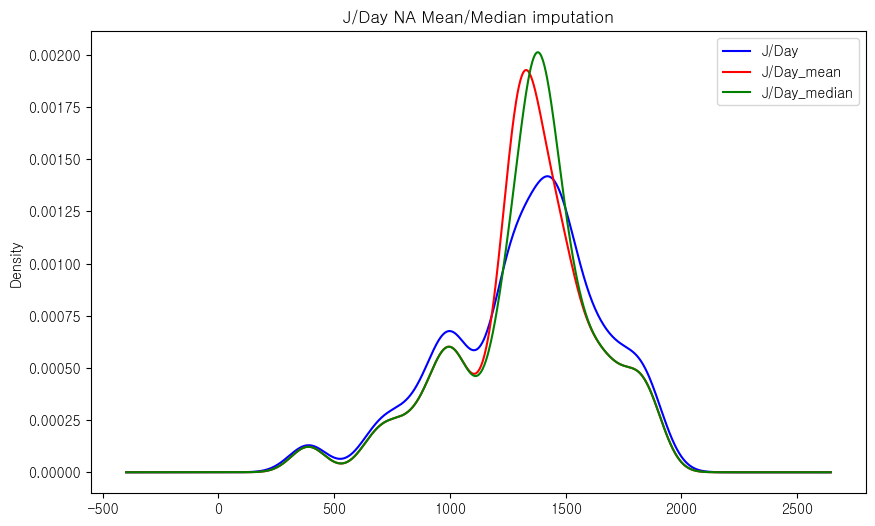

In [230]:
# 분포 시각화
fig, ax = plt.subplots(figsize=(10,6))
df1['J/Day'].plot(kind='kde', ax=ax, color='blue')
df1['J/Day_mean'].plot(kind='kde', ax=ax, color='red')
df1['J/Day_median'].plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
ax.set_title("J/Day NA Mean/Median imputation")


In [231]:
#6번농장 NA Imputation - Random sample imputation
df1['J/Day_random'] = df1['J/Day']
df1

C:\Users\acorn\AppData\Local\Temp\ipykernel_18904\403899422.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['J/Day_random'] = df1['J/Day']


,J/Day,J/Day_mean,J/Day_median,J/Day_random
time,,,,
2021-10-25 11:00:00,1552.0,1552.0,1552.0,1552.0
2021-10-25 12:00:00,1552.0,1552.0,1552.0,1552.0
2021-10-25 13:00:00,1552.0,1552.0,1552.0,1552.0
2021-10-25 14:00:00,1552.0,1552.0,1552.0,1552.0
2021-10-25 15:00:00,1552.0,1552.0,1552.0,1552.0
...,...,...,...,...
2021-12-21 08:00:00,1186.0,1186.0,1186.0,1186.0
2021-12-21 09:00:00,1186.0,1186.0,1186.0,1186.0
2021-12-21 10:00:00,1186.0,1186.0,1186.0,1186.0


In [232]:
# random sampling
temp = (df1['J/Day'].dropna().sample(df1['J/Day'].isnull().sum()))
temp.index = df1[lambda x: x['J/Day'].isnull()].index # index 부여

In [233]:
# NA imputation
df1.loc[df1['J/Day'].isnull(), 'J/Day_random'] = temp

C:\Users\acorn\AppData\Local\Temp\ipykernel_18904\2854309039.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.loc[df1['J/Day'].isnull(), 'J/Day_random'] = temp


In [234]:
# 확인
df1[['J/Day', 'J/Day_random']].isnull().sum()


J/Day           210
J/Day_random      0
dtype: int64

Text(0.5, 1.0, 'J/Day NA Mean/Median/Random imputation')

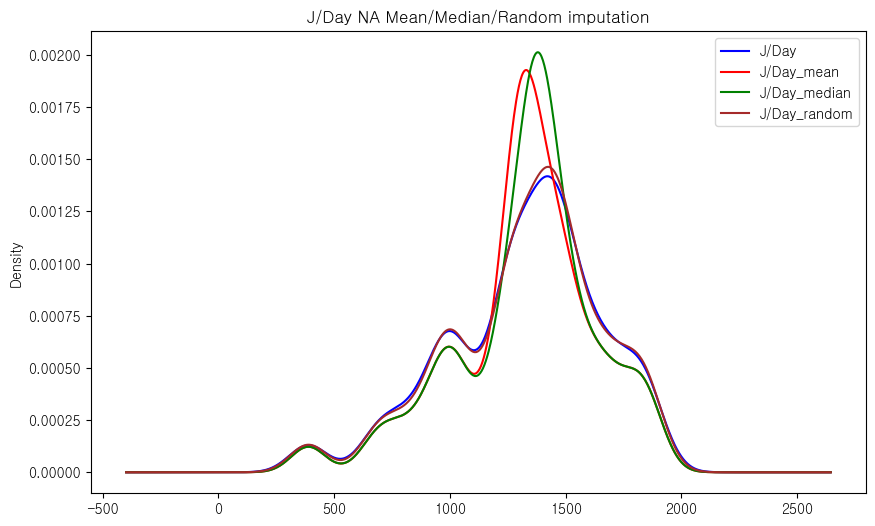

In [235]:
# 분포 시각화
fig, ax = plt.subplots(figsize=(10,6))
df1['J/Day'].plot(kind='kde', ax=ax, color='blue')
df1['J/Day_mean'].plot(kind='kde', ax=ax, color='red')
df1['J/Day_median'].plot(kind='kde', ax=ax, color='green')
df1['J/Day_random'].plot(kind='kde', ax=ax, color='brown')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
ax.set_title("J/Day NA Mean/Median/Random imputation")


In [236]:
df_copy = df
df_copy.head()

,J/Day,EC급액,EC배액,pH급액,pH배액,온도토양,온도급액,온도배액,내부이산화탄소,내부광량,평균온도(℃)
time,,,,,,,,,,,
2021-10-25 11:00:00,1552.0,2.830347,3.722351,5.947333,6.743198,10.627604,14.991536,12.888672,346.968750,260.318064,25.113070
2021-10-25 12:00:00,1552.0,2.805600,3.761688,5.919826,6.748368,21.581048,25.834677,24.141532,343.335484,232.276693,24.407475
2021-10-25 13:00:00,1552.0,2.721864,3.812324,5.923776,6.651351,22.169776,25.094216,24.510261,342.298507,278.202415,24.842023
2021-10-25 14:00:00,1552.0,2.749988,3.906761,5.920353,6.653017,22.758929,25.038866,24.942227,347.647059,217.447628,24.607697
2021-10-25 15:00:00,1552.0,2.713705,3.848237,5.928817,6.644458,22.901563,24.300521,24.143229,361.525000,106.592547,22.910198


# 2. 데이터 결측치 확인 및 처리
## 1) 결측치 처리: IterativeImputer - 다변량 대치 방법

In [237]:
# 결측치 처리: IterativeImputer - 다변량 대치 방법

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imputer = IterativeImputer(random_state = 0)
imputer.fit(df_copy)
mm_df1 = imputer.transform(df_copy)
mm_df1


c:\Users\acorn\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


array([[1552.        ,    2.8303475 ,    3.72235104, ...,  346.96875   ,
         260.31806354,   25.11307021],
       [1552.        ,    2.80559994,    3.76168832, ...,  343.33548387,
         232.2766929 ,   24.4074748 ],
       [1552.        ,    2.72186366,    3.81232358, ...,  342.29850746,
         278.20241493,   24.84202336],
       ...,
       [1186.        ,    2.63920397,    3.33445542, ...,  592.09923664,
         170.12989153,   22.53597351],
       [1186.        ,    2.73116908,    3.27688517, ...,  470.50833333,
         229.257285  ,   23.12264817],
       [1186.        ,    2.79740333,    3.31826333, ...,  452.66666667,
         186.94456667,   21.75579111]])

In [238]:
mm_df1 = pd.DataFrame(mm_df1, columns = df_copy.columns)
mm_df1


,J/Day,EC급액,EC배액,pH급액,pH배액,온도토양,온도급액,온도배액,내부이산화탄소,내부광량,평균온도(℃)
0,1552.0,2.830347,3.722351,5.947333,6.743198,10.627604,14.991536,12.888672,346.968750,260.318064,25.113070
1,1552.0,2.805600,3.761688,5.919826,6.748368,21.581048,25.834677,24.141532,343.335484,232.276693,24.407475
2,1552.0,2.721864,3.812324,5.923776,6.651351,22.169776,25.094216,24.510261,342.298507,278.202415,24.842023
3,1552.0,2.749988,3.906761,5.920353,6.653017,22.758929,25.038866,24.942227,347.647059,217.447628,24.607697
4,1552.0,2.713705,3.848237,5.928817,6.644458,22.901563,24.300521,24.143229,361.525000,106.592547,22.910198
...,...,...,...,...,...,...,...,...,...,...,...
1365,1186.0,2.446037,3.035981,5.622514,5.860288,14.860360,14.969032,16.012387,900.972973,8.541532,13.585806
1366,1186.0,2.474195,3.109794,5.743450,5.867016,15.259205,15.635659,17.381783,813.751938,49.206731,17.653590
1367,1186.0,2.639204,3.334455,5.682939,5.962366,16.438454,18.394561,19.302958,592.099237,170.129892,22.535974
1368,1186.0,2.731169,3.276885,5.512000,6.034342,17.441146,20.093229,19.914583,470.508333,229.257285,23.122648


In [239]:
# 데이터 확인하기
mm_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1370 entries, 0 to 1369
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   J/Day    1370 non-null   float64
 1   EC급액     1370 non-null   float64
 2   EC배액     1370 non-null   float64
 3   pH급액     1370 non-null   float64
 4   pH배액     1370 non-null   float64
 5   온도토양     1370 non-null   float64
 6   온도급액     1370 non-null   float64
 7   온도배액     1370 non-null   float64
 8   내부이산화탄소  1370 non-null   float64
 9   내부광량     1370 non-null   float64
 10  평균온도(℃)  1370 non-null   float64
dtypes: float64(11)
memory usage: 117.9 KB


In [240]:
#결측치 갯수 확인하기
mm_df1.isnull().sum()


J/Day      0
EC급액       0
EC배액       0
pH급액       0
pH배액       0
온도토양       0
온도급액       0
온도배액       0
내부이산화탄소    0
내부광량       0
평균온도(℃)    0
dtype: int64

In [241]:
# 결측치가 아닌 데이터 개수
mm_df1.notnull().sum()

J/Day      1370
EC급액       1370
EC배액       1370
pH급액       1370
pH배액       1370
온도토양       1370
온도급액       1370
온도배액       1370
내부이산화탄소    1370
내부광량       1370
평균온도(℃)    1370
dtype: int64

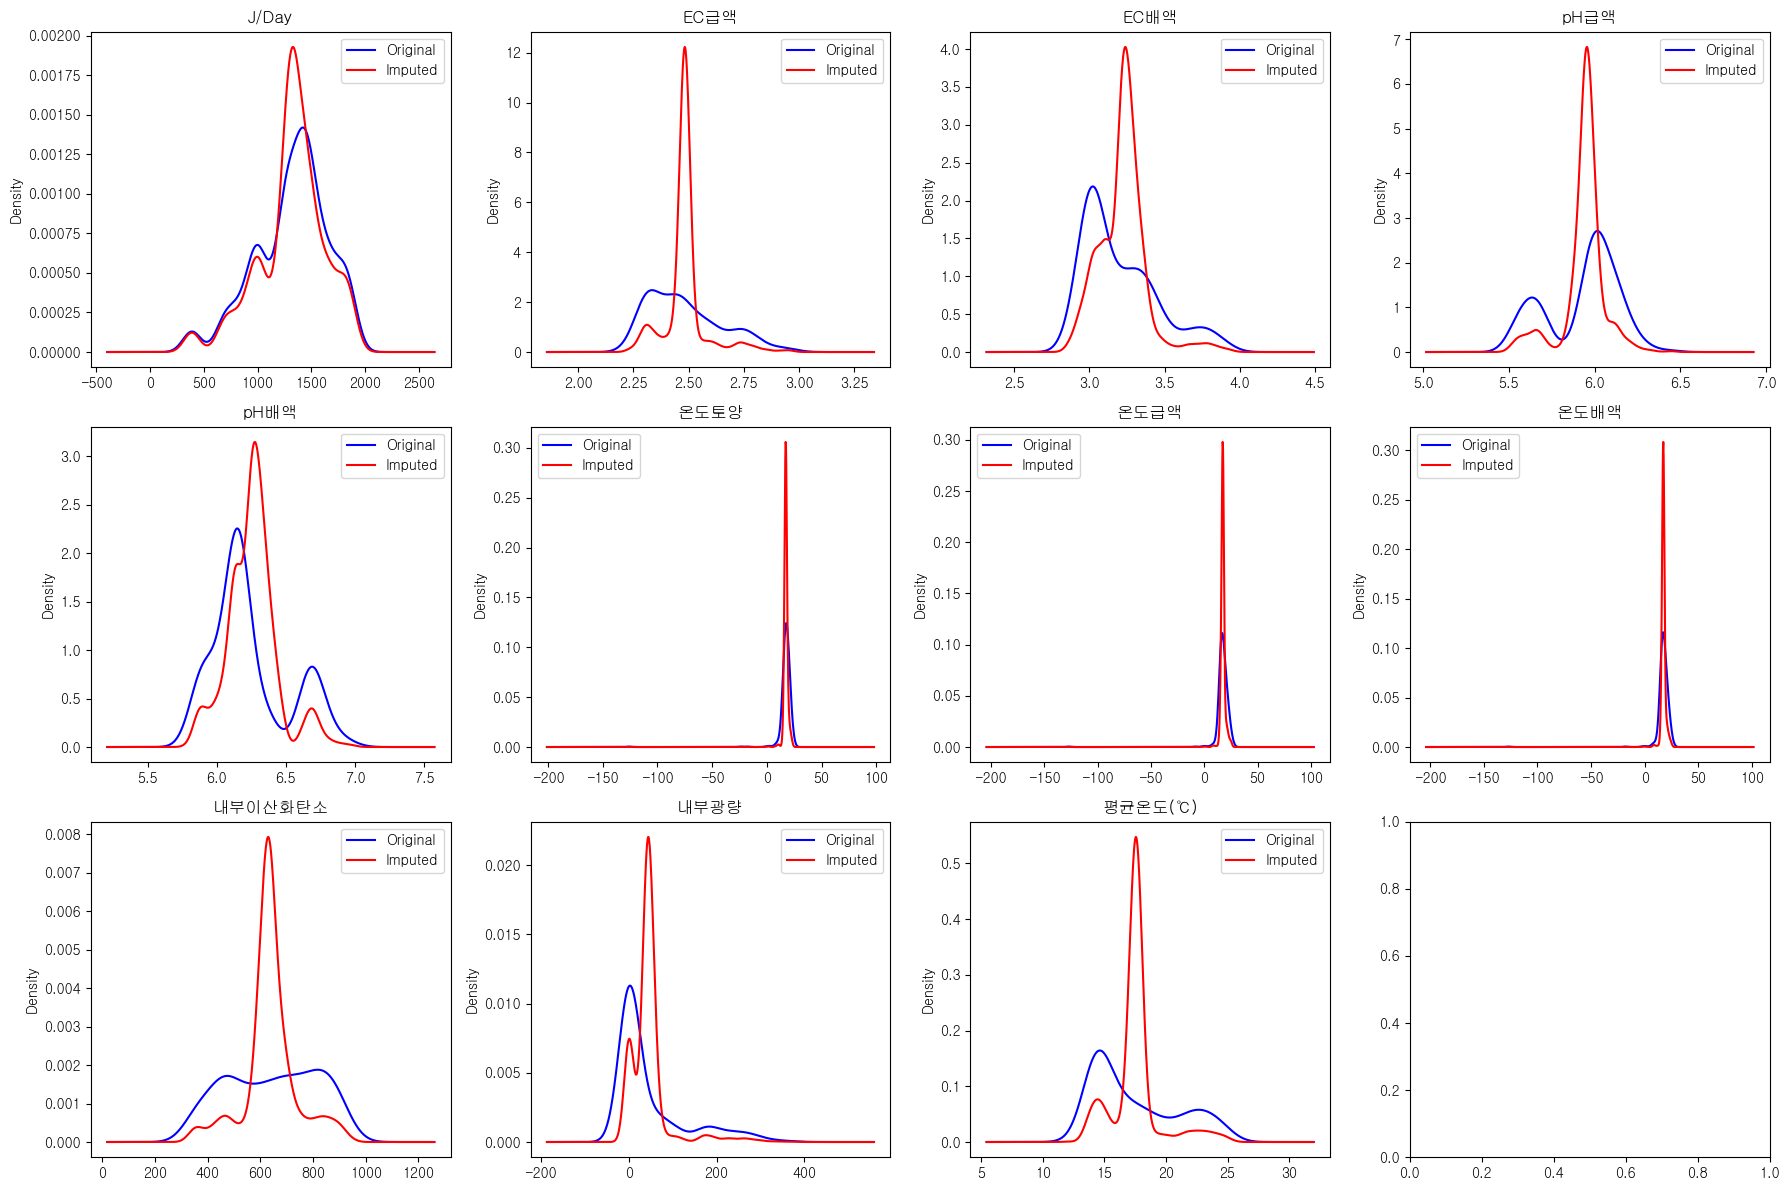

In [243]:
## 분석 시각화하기
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(18, 12))

for i, (column1, column2) in enumerate(zip(df_copy.columns, mm_df1.columns)):
    ax = axes[i // 4, i % 4]
    df_copy[column1].plot(kind='kde', ax=ax, color='blue', label='Original')
    mm_df1[column2].plot(kind='kde', ax=ax, color='red', label='Imputed')
    ax.set_title(column1)
    ax.legend()

plt.tight_layout()
plt.show()


In [244]:
mm_df1

,J/Day,EC급액,EC배액,pH급액,pH배액,온도토양,온도급액,온도배액,내부이산화탄소,내부광량,평균온도(℃)
0,1552.0,2.830347,3.722351,5.947333,6.743198,10.627604,14.991536,12.888672,346.968750,260.318064,25.113070
1,1552.0,2.805600,3.761688,5.919826,6.748368,21.581048,25.834677,24.141532,343.335484,232.276693,24.407475
2,1552.0,2.721864,3.812324,5.923776,6.651351,22.169776,25.094216,24.510261,342.298507,278.202415,24.842023
3,1552.0,2.749988,3.906761,5.920353,6.653017,22.758929,25.038866,24.942227,347.647059,217.447628,24.607697
4,1552.0,2.713705,3.848237,5.928817,6.644458,22.901563,24.300521,24.143229,361.525000,106.592547,22.910198
...,...,...,...,...,...,...,...,...,...,...,...
1365,1186.0,2.446037,3.035981,5.622514,5.860288,14.860360,14.969032,16.012387,900.972973,8.541532,13.585806
1366,1186.0,2.474195,3.109794,5.743450,5.867016,15.259205,15.635659,17.381783,813.751938,49.206731,17.653590
1367,1186.0,2.639204,3.334455,5.682939,5.962366,16.438454,18.394561,19.302958,592.099237,170.129892,22.535974
1368,1186.0,2.731169,3.276885,5.512000,6.034342,17.441146,20.093229,19.914583,470.508333,229.257285,23.122648


## 2) 결측치 처리: SimpleImputer - 평균, 중앙값, 최빈값으로 대치

In [254]:
# 결측치 처리 - mean
from sklearn.impute import SimpleImputer
SI_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
SI_mean.fit(df_copy)
mm_mean_df2 = SI_mean.transform(df_copy)
mm_mean_df2

array([[1552.        ,    2.8303475 ,    3.72235104, ...,  346.96875   ,
         260.31806354,   25.11307021],
       [1552.        ,    2.80559994,    3.76168832, ...,  343.33548387,
         232.2766929 ,   24.4074748 ],
       [1552.        ,    2.72186366,    3.81232358, ...,  342.29850746,
         278.20241493,   24.84202336],
       ...,
       [1186.        ,    2.63920397,    3.33445542, ...,  592.09923664,
         170.12989153,   22.53597351],
       [1186.        ,    2.73116908,    3.27688517, ...,  470.50833333,
         229.257285  ,   23.12264817],
       [1186.        ,    2.79740333,    3.31826333, ...,  452.66666667,
         186.94456667,   21.75579111]])

In [255]:
mm_mean_df2 = pd.DataFrame(mm_mean_df2, columns=df_copy.columns)
mm_mean_df2


,J/Day,EC급액,EC배액,pH급액,pH배액,온도토양,온도급액,온도배액,내부이산화탄소,내부광량,평균온도(℃)
0,1552.0,2.830347,3.722351,5.947333,6.743198,10.627604,14.991536,12.888672,346.968750,260.318064,25.113070
1,1552.0,2.805600,3.761688,5.919826,6.748368,21.581048,25.834677,24.141532,343.335484,232.276693,24.407475
2,1552.0,2.721864,3.812324,5.923776,6.651351,22.169776,25.094216,24.510261,342.298507,278.202415,24.842023
3,1552.0,2.749988,3.906761,5.920353,6.653017,22.758929,25.038866,24.942227,347.647059,217.447628,24.607697
4,1552.0,2.713705,3.848237,5.928817,6.644458,22.901563,24.300521,24.143229,361.525000,106.592547,22.910198
...,...,...,...,...,...,...,...,...,...,...,...
1365,1186.0,2.446037,3.035981,5.622514,5.860288,14.860360,14.969032,16.012387,900.972973,8.541532,13.585806
1366,1186.0,2.474195,3.109794,5.743450,5.867016,15.259205,15.635659,17.381783,813.751938,49.206731,17.653590
1367,1186.0,2.639204,3.334455,5.682939,5.962366,16.438454,18.394561,19.302958,592.099237,170.129892,22.535974
1368,1186.0,2.731169,3.276885,5.512000,6.034342,17.441146,20.093229,19.914583,470.508333,229.257285,23.122648


In [256]:
# 데이터 확인하기
mm_mean_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1370 entries, 0 to 1369
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   J/Day    1370 non-null   float64
 1   EC급액     1370 non-null   float64
 2   EC배액     1370 non-null   float64
 3   pH급액     1370 non-null   float64
 4   pH배액     1370 non-null   float64
 5   온도토양     1370 non-null   float64
 6   온도급액     1370 non-null   float64
 7   온도배액     1370 non-null   float64
 8   내부이산화탄소  1370 non-null   float64
 9   내부광량     1370 non-null   float64
 10  평균온도(℃)  1370 non-null   float64
dtypes: float64(11)
memory usage: 117.9 KB


In [257]:
#결측치 갯수 확인하기
mm_mean_df2.isnull().sum()


J/Day      0
EC급액       0
EC배액       0
pH급액       0
pH배액       0
온도토양       0
온도급액       0
온도배액       0
내부이산화탄소    0
내부광량       0
평균온도(℃)    0
dtype: int64

In [258]:
# 결측치가 아닌 데이터 개수
mm_mean_df2.notnull().sum()

J/Day      1370
EC급액       1370
EC배액       1370
pH급액       1370
pH배액       1370
온도토양       1370
온도급액       1370
온도배액       1370
내부이산화탄소    1370
내부광량       1370
평균온도(℃)    1370
dtype: int64

In [260]:
# 결측치 처리 - median
from sklearn.impute import SimpleImputer
SI_median = SimpleImputer(missing_values=np.nan, strategy='median')
SI_median.fit(df_copy)
mm_median_df2 = SI_median.transform(df_copy)
print(mm_median_df2)
mm_median_df2 = pd.DataFrame(mm_median_df2, columns=df_copy.columns)
mm_median_df2.info()


[[1552.            2.8303475     3.72235104 ...  346.96875
   260.31806354   25.11307021]
 [1552.            2.80559994    3.76168832 ...  343.33548387
   232.2766929    24.4074748 ]
 [1552.            2.72186366    3.81232358 ...  342.29850746
   278.20241493   24.84202336]
 ...
 [1186.            2.63920397    3.33445542 ...  592.09923664
   170.12989153   22.53597351]
 [1186.            2.73116908    3.27688517 ...  470.50833333
   229.257285     23.12264817]
 [1186.            2.79740333    3.31826333 ...  452.66666667
   186.94456667   21.75579111]]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1370 entries, 0 to 1369
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   J/Day    1370 non-null   float64
 1   EC급액     1370 non-null   float64
 2   EC배액     1370 non-null   float64
 3   pH급액     1370 non-null   float64
 4   pH배액     1370 non-null   float64
 5   온도토양     1370 non-null   float64
 6   온도급액     1370 non-null 

In [261]:
# 결측치 처리 - most_frequent
from sklearn.impute import SimpleImputer
SI_most_frequent = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
SI_most_frequent.fit(df_copy)
mm_most_frequent_df2 = SI_most_frequent.transform(df_copy)
print(mm_most_frequent_df2)
mm_most_frequent_df2 = pd.DataFrame(mm_most_frequent_df2, columns=df_copy.columns)
mm_most_frequent_df2.info()


[[1552.            2.8303475     3.72235104 ...  346.96875
   260.31806354   25.11307021]
 [1552.            2.80559994    3.76168832 ...  343.33548387
   232.2766929    24.4074748 ]
 [1552.            2.72186366    3.81232358 ...  342.29850746
   278.20241493   24.84202336]
 ...
 [1186.            2.63920397    3.33445542 ...  592.09923664
   170.12989153   22.53597351]
 [1186.            2.73116908    3.27688517 ...  470.50833333
   229.257285     23.12264817]
 [1186.            2.79740333    3.31826333 ...  452.66666667
   186.94456667   21.75579111]]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1370 entries, 0 to 1369
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   J/Day    1370 non-null   float64
 1   EC급액     1370 non-null   float64
 2   EC배액     1370 non-null   float64
 3   pH급액     1370 non-null   float64
 4   pH배액     1370 non-null   float64
 5   온도토양     1370 non-null   float64
 6   온도급액     1370 non-null 

c:\Users\acorn\anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


## 3)결측치 처리: KNNImputer

In [267]:
from sklearn.impute import KNNImputer
imputer3 = KNNImputer(n_neighbors = 3)
mm_knn3_df = imputer3.fit_transform(df_copy)
mm_knn3_df = pd.DataFrame(
    mm_knn3_df, columns=df_copy.columns)

imputer4 = KNNImputer(n_neighbors = 4)
mm_knn4_df = imputer4.fit_transform(df_copy)
mm_knn4_df = pd.DataFrame(
    mm_knn4_df, columns=df_copy.columns)

imputer5 = KNNImputer(n_neighbors = 5)
mm_knn5_df = imputer5.fit_transform(df_copy)
mm_knn5_df = pd.DataFrame(
    mm_knn5_df, columns=df_copy.columns)


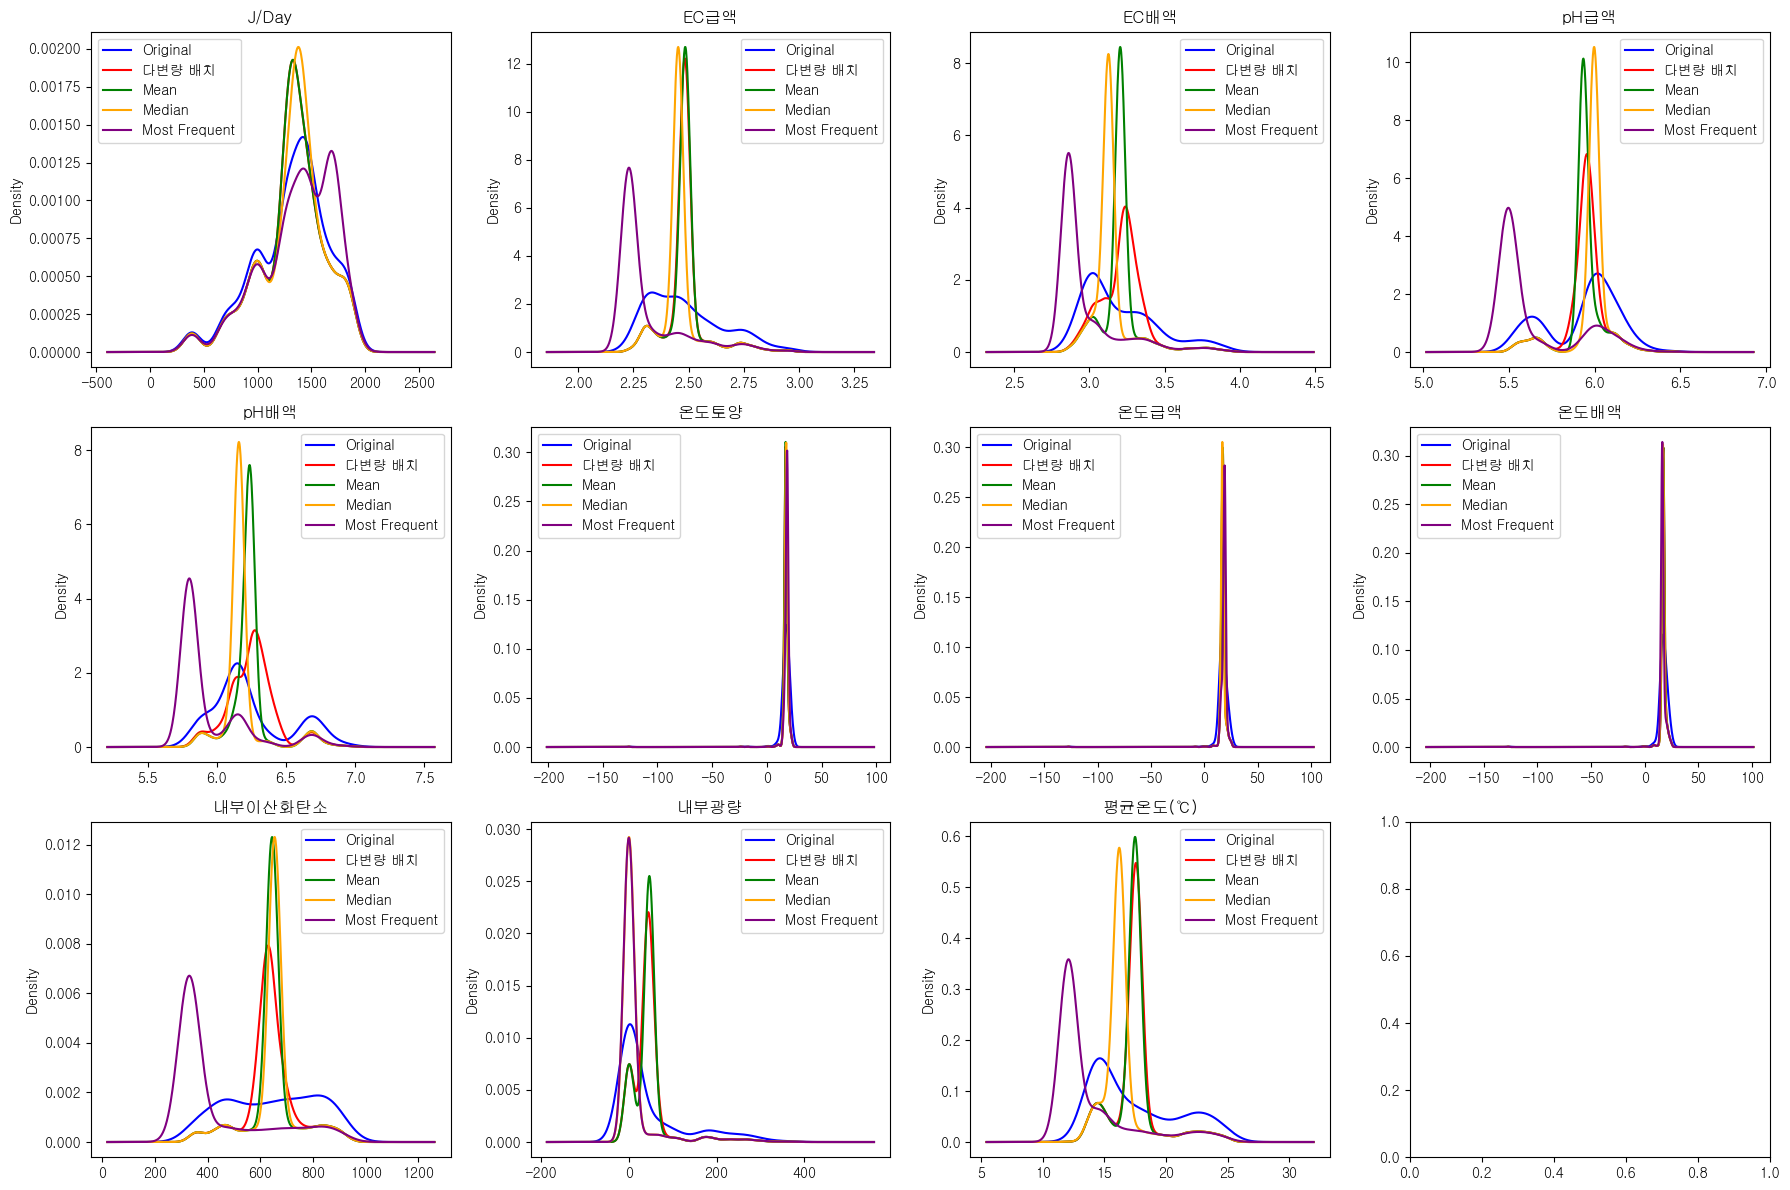

In [266]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(18, 12))

for i, (column1, column2, column3, column4, column5) in enumerate(zip(df_copy.columns, mm_df1.columns,
                                                                      mm_mean_df2.columns, mm_median_df2.columns,
                                                                      mm_most_frequent_df2.columns)):
    ax = axes[i // 4, i % 4]
    df_copy[column1].plot(kind='kde', ax=ax, color='blue', label='Original')
    mm_df1[column2].plot(kind='kde', ax=ax, color='red',
                         label='다변량 배치')
    mm_mean_df2[column3].plot(
        kind='kde', ax=ax, color='green', label='Mean')
    mm_median_df2[column4].plot(
        kind='kde', ax=ax, color='orange', label='Median')
    mm_most_frequent_df2[column5].plot(
        kind='kde', ax=ax, color='purple', label='Most Frequent')
    ax.set_title(column1)
    ax.legend()

plt.tight_layout()
plt.show()


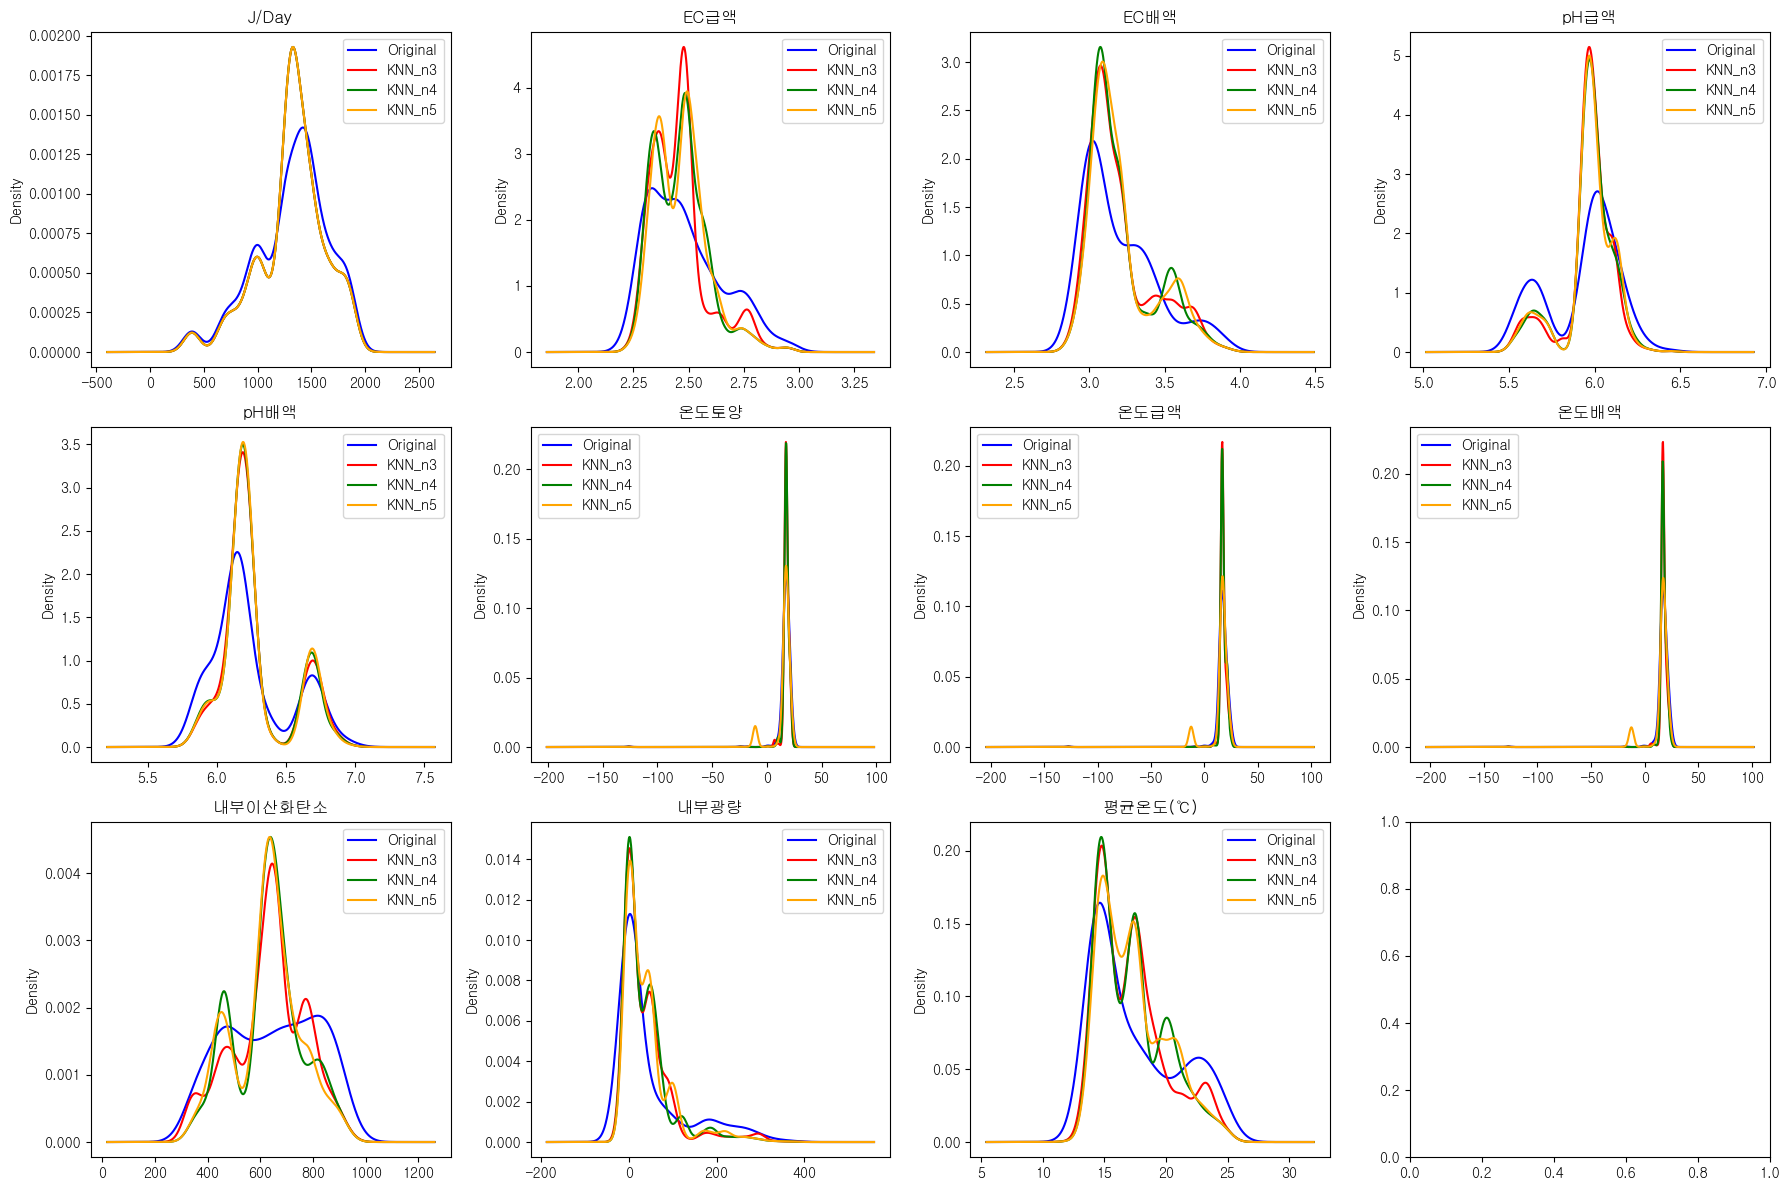

In [268]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(18, 12))

for i, (column1, column2, column3, column4) in enumerate(zip(df_copy.columns, mm_knn3_df.columns,
                                                                      mm_knn4_df.columns, mm_knn5_df.columns)):
    ax = axes[i // 4, i % 4]
    df_copy[column1].plot(kind='kde', ax=ax, color='blue', label='Original')
    mm_knn3_df[column2].plot(kind='kde', ax=ax, color='red',
                         label='KNN_n3')
    mm_knn4_df[column3].plot(
        kind='kde', ax=ax, color='green', label='KNN_n4')
    mm_knn5_df[column4].plot(
        kind='kde', ax=ax, color='orange', label='KNN_n5')
    ax.set_title(column1)
    ax.legend()

plt.tight_layout()
plt.show()


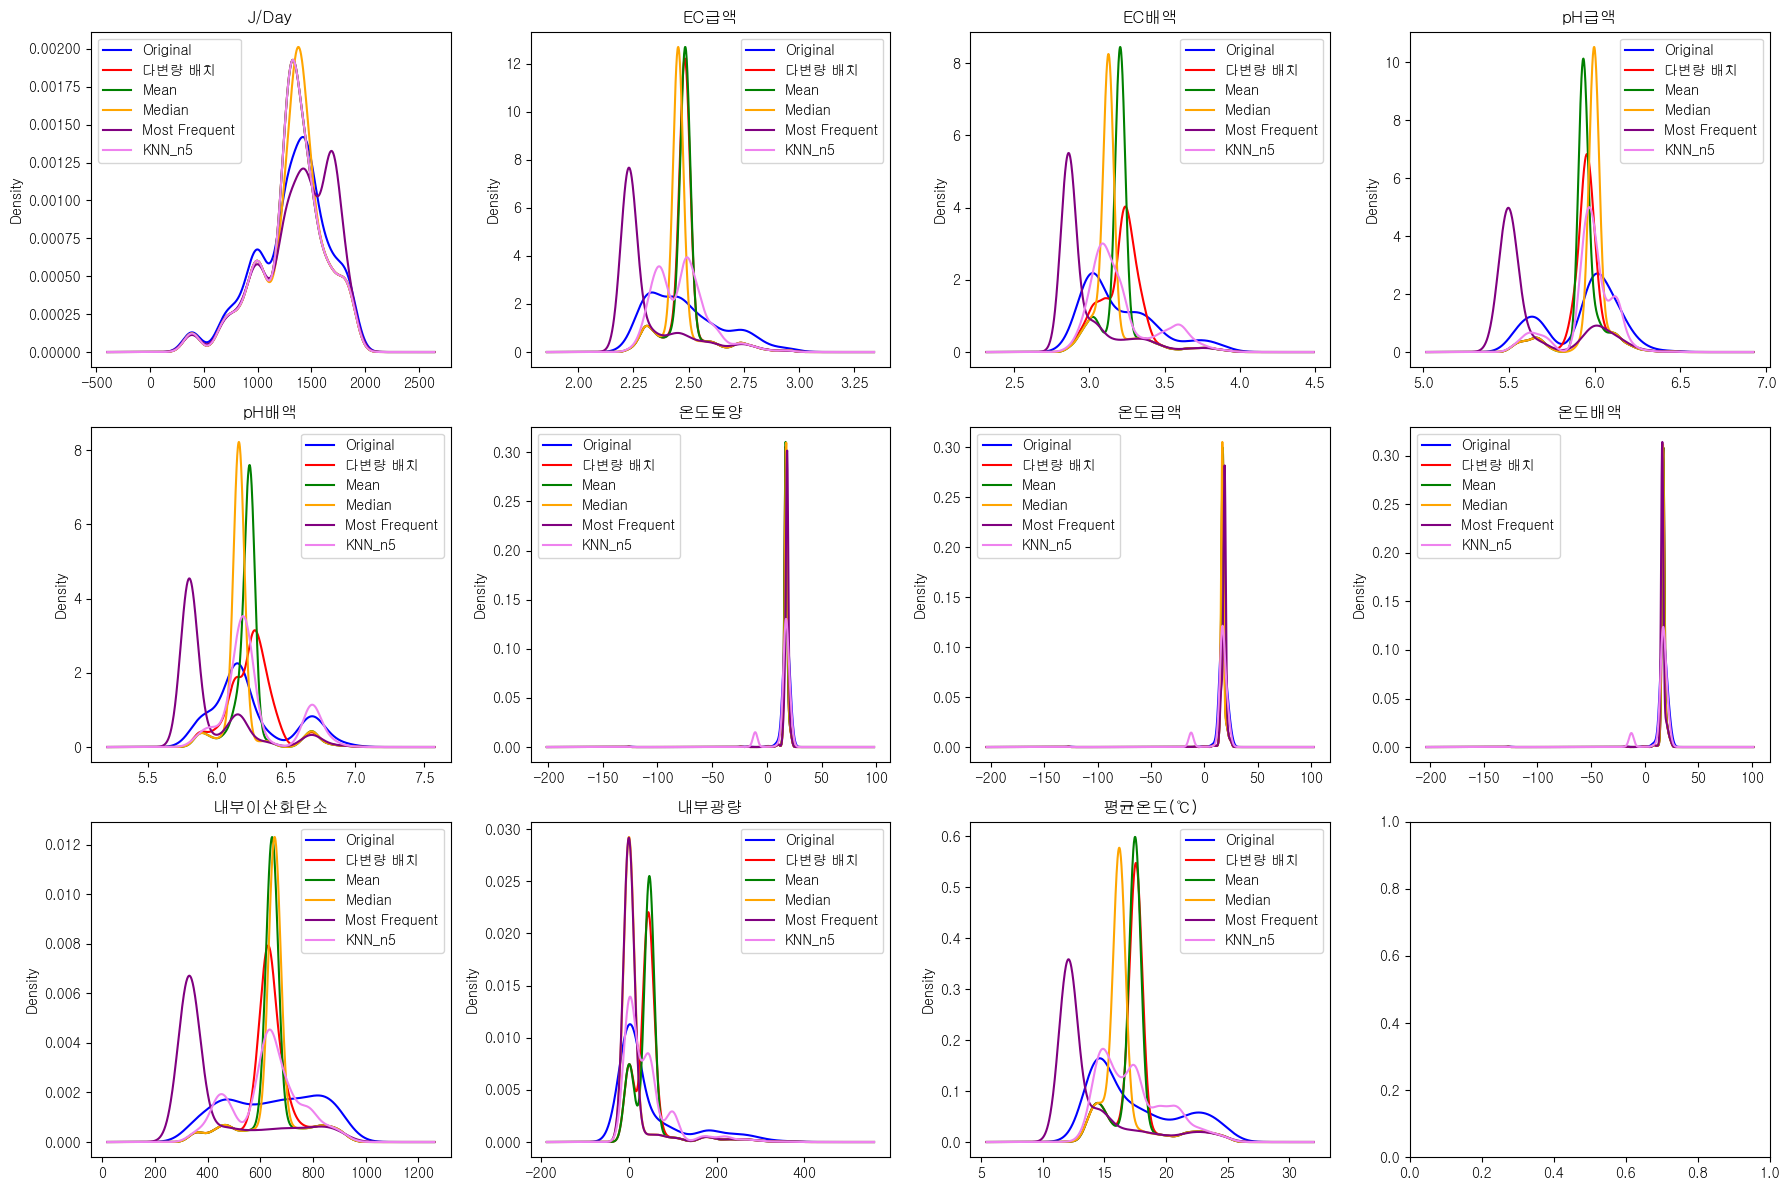

In [269]:
### 6번 농장 data 분포도 시각화

import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(18, 12))

for i, (column1, column2, column3, column4, column5, column6) in enumerate(zip(df_copy.columns, mm_df1.columns,
                                                                      mm_mean_df2.columns, mm_median_df2.columns,
                                                                      mm_most_frequent_df2.columns, mm_knn5_df.columns)):
    ax = axes[i // 4, i % 4]
    df_copy[column1].plot(kind='kde', ax=ax, color='blue', label='Original')
    mm_df1[column2].plot(kind='kde', ax=ax, color='red',
                         label='다변량 배치')
    mm_mean_df2[column3].plot(
        kind='kde', ax=ax, color='green', label='Mean')
    mm_median_df2[column4].plot(
        kind='kde', ax=ax, color='orange', label='Median')
    mm_most_frequent_df2[column5].plot(
        kind='kde', ax=ax, color='purple', label='Most Frequent')
    mm_knn5_df[column6].plot(
        kind='kde', ax=ax, color='violet', label='KNN_n5')
    ax.set_title(column1)
    ax.legend()

plt.tight_layout()
plt.show()


# 3. 이상치 확인 및 처리
## 1) 이상값 처리 방법들: Trim, Winsorizing, DBSCAN
- 이상치들을 절단(trim)하는 방법
- 이상치들을 이상치의 하한값, 상한값으로 변환하는 조정(winsorizing)의 방법